Q1 Load the following image and detect as much as you can all faces



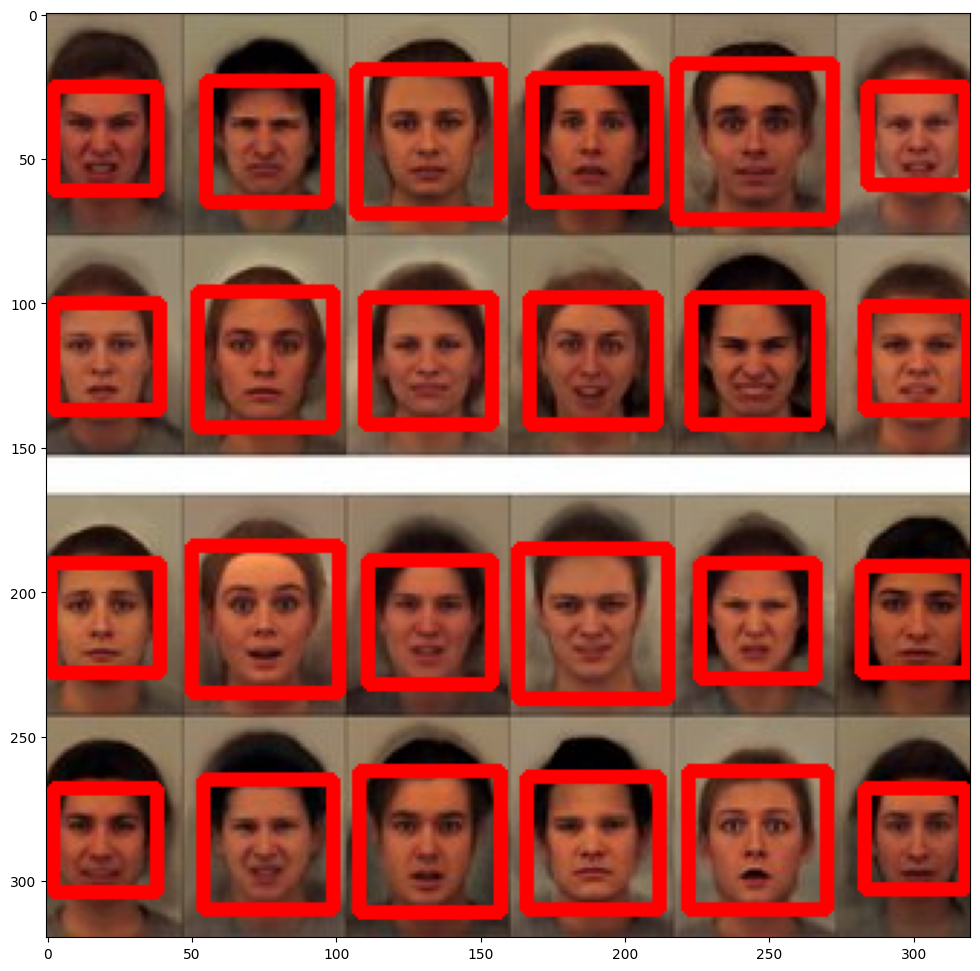

In [1]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('faces.jpg')
faceClassifier = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

img_in_grayscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
Resluting_Faces = faceClassifier.detectMultiScale(img_in_grayscale,scaleFactor=1.007,minNeighbors=18,minSize=(20,20))

for x , y , w , h in Resluting_Faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),4)
    face_slice=img_in_grayscale[y:y+h,x:x+w]
plt.figure(figsize=(12,12))
plt.imshow(face_slice,cmap='gray')
plt.imshow(img[:,:,::-1])    

Q2 Load the following image and detect faces,eye,smile and write under every
detection label “Peter” ,”eye” ,”smile” as arranged.

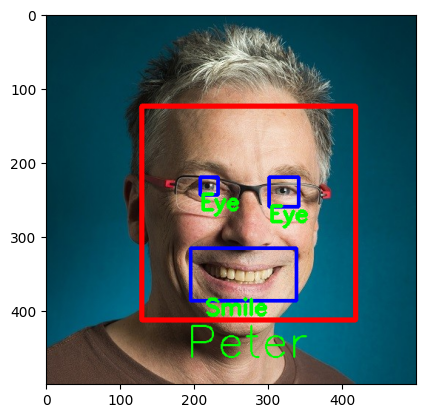

In [2]:
import cv2
from matplotlib import pyplot as plt

peter = cv2.imread('peter.jpg')
#plt.imshow(peter[:,:,::-1])
peter_in_grayScale = cv2.cvtColor(peter,cv2.COLOR_BGR2GRAY)
#plt.imshow(peter_in_grayScale,cmap='gray')
faceClassifier = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeClassifier  = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
smileClassifier= cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')

Peter_Face = faceClassifier.detectMultiScale(peter_in_grayScale,scaleFactor=1.05,minNeighbors=6,minSize=(60,60))

for x , y , width , height in Peter_Face:
    cv2.rectangle(peter,(x,y),(x+width,y+height),(0,0,255),5)
    face_slice = peter_in_grayScale[y:y+height,x:x+width]
cv2.putText(peter,'Peter',(x+60,y+height+50),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)    
eyes = eyeClassifier.detectMultiScale(face_slice,scaleFactor=1.02,minNeighbors=15,minSize=(20,20))
for x_eye,y_eye,width_eye,height_eye in eyes:
    cv2.rectangle(peter,(x+x_eye,y+y_eye),(x+x_eye+width_eye,y+y_eye+height_eye),(255,0,0),4)
    cv2.putText(peter,'Eye',(x+x_eye,y+y_eye+height_eye+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)    

smile = smileClassifier.detectMultiScale(face_slice,scaleFactor=1.2,minNeighbors=20,minSize=(60,60))
for x_smile, y_smile , width_smile , height_smile in smile:
    cv2.rectangle(peter,(x+x_smile,y+y_smile),(x+x_smile+width_smile,y+y_smile+height_smile),(255,0,0),4)
cv2.putText(peter,'Smile',(x+x_smile+20,y+y_smile+90),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4)    

plt.imshow(face_slice,cmap='gray')
plt.imshow(peter[:,:,::-1])


Q3Run your camera stream and make detection for faces,eye,smile and write
under every detection label “me” ,”eye” ,”smile” as arranged. Make circle for eye
and others rectangle

In [23]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
cap=cv2.VideoCapture(0)
i=0
while cap.isOpened():
    stat, frame=cap.read()
    if stat==True:
        gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faceClassifier = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
        eyeClassifier  = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
        smileClassifier= cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')
      
        My_face = faceClassifier.detectMultiScale(gray_frame,scaleFactor=1.05,minNeighbors=6,minSize=(60,60))
        
        for x , y , width , height in My_face:
            cv2.rectangle(frame,(x,y),(x+width,y+height),(0,0,255),5)
            face_slice = gray_frame[y:y+height,x:x+width]
        cv2.putText(frame,'Omar',(x+60,y+height+50),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)    
        
        eyes = eyeClassifier.detectMultiScale(face_slice,scaleFactor=1.02,minNeighbors=15,minSize=(20,20))
        
        for x_eye,y_eye,width_eye,height_eye in eyes:
            cv2.circle(frame,(x+x_eye+30,y+y_eye+30),20,(255,0,0),4)
            cv2.putText(frame,'Eye',(x+x_eye,y+y_eye+height_eye+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)    

        smile = smileClassifier.detectMultiScale(face_slice,scaleFactor=1.1,minNeighbors=20,minSize=(60,60))
        for x_smile, y_smile , width_smile , height_smile in smile:
            cv2.rectangle(frame,(x+x_smile,y+y_smile),(x+x_smile+width_smile,y+y_smile+height_smile),(255,0,0),4)
            cv2.putText(frame,'Smile',(x+x_smile+20,y+y_smile+90),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4)    

        cv2.imshow("my_video",frame)
        k=cv2.waitKey(16)
        if k==ord('q'):
            break
        if k == ord('s'):
            cv2.imwrite('img'+str(i)+'.png',frame)
            i+=1
        
    else:
        cv2.destroyAllWindows()
        break
cap.release()
cv2.destroyAllWindows()

